# Inference plot of 3 regions

In [1]:
# Import libraries
import numpy as np
import math
import branchpro
import scipy.stats
import matplotlib
import plotly.graph_objects as go
from matplotlib import pyplot as plt
import os
import pandas as pd
import datetime

In [2]:
# Read serial interval
si_file = 'si-epinow'
path = os.path.join('../data_library/serial_interval', '{}.csv'.format(si_file))
serial_interval = pd.read_csv(path, header=None)
serial_interval = serial_interval.fillna(0)
serial_intervals = serial_interval.values.T

## Ontaria data

In [3]:
# Read Ontario data
path = os.path.join('../data_library/covid_ontario/ON.csv')
data = pd.read_csv(path)[:51]

In [4]:
time_key = 'Time'
num_timepoints = max(data[time_key])
data_times = data[time_key]

# Pad with zeros the time points where we have no information on
# the number of incidences
padded_inc_data = data.set_index(time_key).reindex(
    range(
        1, max(data_times)+1)
        ).fillna(0).reset_index()
locally_infected_cases_ON = padded_inc_data['Incidence Number']
imported_cases_ON = padded_inc_data['Imported Cases']

start_times = np.arange(1, num_timepoints+1, dtype=int)
times = np.arange(num_timepoints+1)

In [5]:
tau = 6
R_t_start = tau+1
a = 1
b = 0.2

# Run inferences for different values of epsilon
column_names = ['Time Points', 'Mean', 'Lower bound CI', 'Upper bound CI', 'Central Probability', 'Epsilon']
epsilon_range = [0.25, 1, 2]
chosen_times = [10, 15, 20, 25, 30, 40]

all_intervals = pd.DataFrame(columns=column_names)
all_intervals_chosen = pd.DataFrame(columns=column_names)
# Transform our incidence data into pandas dataframes
inc_data = pd.DataFrame(
    {
        'Time': start_times,
        'Incidence Number': locally_infected_cases_ON
    }
)

imported_inc_data = pd.DataFrame(
    {
        'Time': start_times,
        'Incidence Number': imported_cases_ON
    }
)

for epsilon in epsilon_range:
    inference = branchpro.LocImpBranchProPosteriorMultSI(
        inc_data=inc_data,
        imported_inc_data=imported_inc_data,
        epsilon=epsilon,
        daily_serial_intervals=serial_intervals,
        alpha=a,
        beta=b)

    inference.run_inference(tau=tau)
    intervals = inference.get_intervals(central_prob=0)
    intervals = intervals.append(inference.get_intervals(central_prob=.25))
    intervals = intervals.append(inference.get_intervals(central_prob=.95))
    temp = inference.get_intervals(central_prob=.95)

    intervals['Epsilon'] = [epsilon] * len(intervals.index)

    intervals_chosen = pd.DataFrame(columns=intervals.columns)
    for time_pt in chosen_times:
        intervals_chosen = intervals_chosen.append(
            intervals.loc[intervals['Time Points']== time_pt])

    all_intervals = all_intervals.append(intervals)
    all_intervals_chosen = all_intervals_chosen.append(intervals_chosen)

In [6]:
inference_times = sorted(list(set(all_intervals['Time Points'].tolist())))
all_intervals_ON = all_intervals[all_intervals['Central Probability']==0.95]

## New South Wales data

In [7]:
# Read New South Wales data
path = os.path.join('../data_library/covid_australia/NSW.csv')
data = pd.read_csv(path)[:51]

time_key = 'Time'
num_timepoints = max(data[time_key])
data_times = data[time_key]

# Pad with zeros the time points where we have no information on
# the number of incidences
padded_inc_data = data.set_index(time_key).reindex(
    range(
        1, max(data_times)+1)
        ).fillna(0).reset_index()
locally_infected_cases_NSW = padded_inc_data['Incidence Number']
imported_cases_NSW = padded_inc_data['Imported Cases']

start_times = np.arange(1, num_timepoints+1, dtype=int)
times = np.arange(num_timepoints+1)

In [8]:
# Run inferences for different values of epsilon
column_names = ['Time Points', 'Mean', 'Lower bound CI', 'Upper bound CI', 'Central Probability', 'Epsilon']
epsilon_range = [0.25, 1, 2]
chosen_times = [10, 15, 20, 25, 30, 40]

all_intervals = pd.DataFrame(columns=column_names)
all_intervals_chosen = pd.DataFrame(columns=column_names)
# Transform our incidence data into pandas dataframes
inc_data = pd.DataFrame(
    {
        'Time': start_times,
        'Incidence Number': locally_infected_cases_NSW
    }
)

imported_inc_data = pd.DataFrame(
    {
        'Time': start_times,
        'Incidence Number': imported_cases_NSW
    }
)

for epsilon in epsilon_range:
    inference = branchpro.LocImpBranchProPosteriorMultSI(
        inc_data=inc_data,
        imported_inc_data=imported_inc_data,
        epsilon=epsilon,
        daily_serial_intervals=serial_intervals,
        alpha=a,
        beta=b)

    inference.run_inference(tau=tau)
    intervals = inference.get_intervals(central_prob=0)
    intervals = intervals.append(inference.get_intervals(central_prob=.25))
    intervals = intervals.append(inference.get_intervals(central_prob=.95))
    temp = inference.get_intervals(central_prob=.95)

    intervals['Epsilon'] = [epsilon] * len(intervals.index)

    intervals_chosen = pd.DataFrame(columns=intervals.columns)
    for time_pt in chosen_times:
        intervals_chosen = intervals_chosen.append(
            intervals.loc[intervals['Time Points']== time_pt])

    all_intervals = all_intervals.append(intervals)
    all_intervals_chosen = all_intervals_chosen.append(intervals_chosen)

In [9]:
inference_times = sorted(list(set(all_intervals['Time Points'].tolist())))
all_intervals_NSW = all_intervals[all_intervals['Central Probability']==0.95]

## Victoria data

In [10]:
# Read Victoria data
path = os.path.join('../data_library/covid_australia/VIC.csv')
data = pd.read_csv(path)[:51]

time_key = 'Time'
num_timepoints = max(data[time_key])
data_times = data[time_key]

# Pad with zeros the time points where we have no information on
# the number of incidences
padded_inc_data = data.set_index(time_key).reindex(
    range(
        1, max(data_times)+1)
        ).fillna(0).reset_index()
locally_infected_cases_VIC = padded_inc_data['Incidence Number']
imported_cases_VIC = padded_inc_data['Imported Cases']

start_times = np.arange(1, num_timepoints+1, dtype=int)
times = np.arange(num_timepoints+1)

# Run inferences for different values of epsilon
column_names = ['Time Points', 'Mean', 'Lower bound CI', 'Upper bound CI', 'Central Probability', 'Epsilon']
epsilon_range = [0.25, 1, 2]
chosen_times = [10, 15, 20, 25, 30, 40]

all_intervals = pd.DataFrame(columns=column_names)
all_intervals_chosen = pd.DataFrame(columns=column_names)
# Transform our incidence data into pandas dataframes
inc_data = pd.DataFrame(
    {
        'Time': start_times,
        'Incidence Number': locally_infected_cases_VIC
    }
)

imported_inc_data = pd.DataFrame(
    {
        'Time': start_times,
        'Incidence Number': imported_cases_VIC
    }
)

for epsilon in epsilon_range:
    inference = branchpro.LocImpBranchProPosteriorMultSI(
        inc_data=inc_data,
        imported_inc_data=imported_inc_data,
        epsilon=epsilon,
        daily_serial_intervals=serial_intervals,
        alpha=a,
        beta=b)

    inference.run_inference(tau=tau)
    intervals = inference.get_intervals(central_prob=0)
    intervals = intervals.append(inference.get_intervals(central_prob=.25))
    intervals = intervals.append(inference.get_intervals(central_prob=.95))
    temp = inference.get_intervals(central_prob=.95)

    intervals['Epsilon'] = [epsilon] * len(intervals.index)

    intervals_chosen = pd.DataFrame(columns=intervals.columns)
    for time_pt in chosen_times:
        intervals_chosen = intervals_chosen.append(
            intervals.loc[intervals['Time Points']== time_pt])

    all_intervals = all_intervals.append(intervals)
    all_intervals_chosen = all_intervals_chosen.append(intervals_chosen)
    
prior_dist = scipy.stats.gamma(a, scale=1/b)

inference_times = sorted(list(set(all_intervals['Time Points'].tolist())))
epsilon_range = [0.25, 1, 2]
all_intervals_VIC = all_intervals[all_intervals['Central Probability']==0.95]


## Combine inference plots

In [25]:
def plot_r_inference(first_day_data,
                     local_cases,
                     import_cases,
                     first_day_inference,
                     epsilons,
                     R_t_results,
                     prior_mid,
                     default_epsilon=1,
                     show=True):
    """Make a figure showing R_t inference for different choices of epsilon.

    It has two panels:
        a. Local and imported cases which were used for inference
        b. Subplots each comparing R_t for one choice of epsilon with the
           default choice.

    Notes
    -----
    As written this function expects a total of five epsilon values (including
    the default value).

    Parameters
    ----------
    first_day_data : datetime.datetime
        First day of incidence data
    local_cases : list of int
        Daily incident local cases
    import_cases : list of int
        Daily incident imported cases
    first_day_inference : datetime.datetime
        First day of inference results
    epsilons : list of float
        Values of epsilon for which inference was performed
    R_t_results : list of pandas.DataFrame
        For each epsilon, a dataframe giving the inference results for R_t. It
        must have the three columns 'Mean', 'Lower bound CI', and
        'Upper bound CI'.
    prior_mid : float
        The prior median of R_t
    default_epsilon : float, optional (1)
        The value of epsilon whose inference results will be compared to the
        results from all other values of epsilon.
    show : bool, optional (True)
        Whether or not to plt.show() the figure after it has been generated

    Returns
    -------
    matplotlib.figure.Figure
    """
    # Build grid of subplots
    # Use 0.1 height ratio subplot rows to space out the panels
    fig = plt.figure()
    gs = fig.add_gridspec(3, 3, height_ratios=[1, 0.01, 1])

    # Ax for case data
    top_axs = [fig.add_subplot(gs[0, i]) for i in [0, 1, 2]]

    # Axes for R_t inference
    axs = [fig.add_subplot(gs[2, j]) for j in [0, 1, 2]]

    # Make them all share both x and y axis
    axs[0].sharex(top_axs[0])
    axs[1].sharex(top_axs[1])
    axs[2].sharex(top_axs[2])
#     for i in range(6):  
#         if i < 3:
#             axs[i].tick_params(labelbottom=False)

    # Plot local and imported cases
    width = datetime.timedelta(hours=10)
    
    for region in range(3):
        data_times = [first_day_data + datetime.timedelta(days=int(i))
                      for i in range(len(local_cases[region]))]
        top_axs[region].bar([x - width/2 for x in data_times],
                   local_cases[region],
                   width,
                   label='Local cases',
                   color='k',
                   alpha=0.8)
        top_axs[region].bar([x + width/2 for x in data_times],
                   import_cases[region],
                   width,
                   hatch='/////',
                   edgecolor='w',
                   lw=0.1,
                   label='Imported cases',
                   color='deeppink')
        if region == 0:
            top_axs[region].legend()
            axins = top_axs[0].inset_axes([0.08, 0.27, 0.4, 0.3])
            axins.bar([x - width/2 for x in data_times],
                       local_cases[region],
                       width,
                       label='Local cases',
                       color='k',
                       alpha=0.8)
            axins.bar([x + width/2 for x in data_times],
                       import_cases[region],
                       width,
                       hatch='/////',
                       edgecolor='w',
                       lw=0.1,
                       label='Imported cases',
                       color='deeppink')

        # Get R_t for the default epsilon
        default_results = R_t_results[region][epsilons.index(default_epsilon)]

        # Build time vector for all R_t
        times = len(default_results['Mean'])
        date_times = [first_day_inference + datetime.timedelta(days=int(i))
                      for i in range(times)]

        ind = 0
        color_list = ['blue', 'red']
        lines = []
        shades = []
        for epsilon, results in zip(epsilons, R_t_results[region]):
            if epsilon != default_epsilon:
                ax = axs[region]

                # Plot shaded region for R_t
                line, = ax.plot(date_times,
                                results['Mean'],
                                color=color_list[ind],
                                lw=1.0,
                                zorder=8)
                shade = ax.fill_between(date_times,
                                        results['Lower bound CI'],
                                        results['Upper bound CI'],
                                        alpha=0.35,
                                        color=color_list[ind],
                                        zorder=6,
                                        linewidth=0.0)

                # Plot another region for the default epsilon inference results
                zeroline, = ax.plot(date_times,
                                    default_results['Mean'],
                                    color='k',
                                    lw=1.0,
                                    ls='--',
                                    zorder=7)
                zerorange = ax.fill_between(date_times,
                                            default_results['Lower bound CI'],
                                            default_results['Upper bound CI'],
                                            alpha=0.35,
                                            color='k',
                                            zorder=-10,
                                            linewidth=0.0)
                # Add a texture to the region for default epsilon R_t
                zerorangelines = ax.fill_between(
                    date_times,
                    default_results['Lower bound CI'],
                    default_results['Upper bound CI'],
                    alpha=1.0,
                    color=None,
                    facecolor='none',
                    zorder=5,
                    hatch='||||',
                    edgecolor='w',
                    linewidth=0)

                # Add labels if the subplot is on the left side of the figure
                ax.set_ylabel(r'$R_t^\mathrm{local}$')

                # Add a dotted line for the prior median
#                 prior_line = ax.axhline(prior_mid,
#                                         color='k',
#                                         zorder=-20,
#                                         ls=':',
#                                         lw=2)

                # Add dotted line for R_t = 1
                Rt_line = ax.axhline(1,
                                        color='darkgray',
                                        zorder=-20,
                                        ls='-',
                                        lw=2)

                lines.append(line)
                shades.append(shade)
#                 if ax_ind[ind] == 0:
#                     # Add the legend with prior median and default epsilon
#                     fig.legend([Rt_line, (zerorange, zerorangelines, zeroline)],
#                                [r'$R_t^\mathrm{local}=1$', r'$ϵ={}$'.format(default_epsilon)],
#                                bbox_to_anchor=(0.98, 0.64),
#                                ncol=2)
                ind += 1

        # sub region of the original image
        if region == 0:
            x1, x2, y1, y2 = datetime.datetime(2020, 3, 1), datetime.datetime(2020, 3, 10), 0, 10
            axins.set_xlim(x1, x2)
            axins.set_ylim(y1, y2)
            axins.set_xticklabels('')
            axins.set_yticks([0,7])
            axins.set_yticklabels(['0','7'], fontdict={'fontsize':9})

            top_axs[0].indicate_inset_zoom(axins, edgecolor="black")
    
    # Add the legend for epsilons
    axs[0].legend([(lines[0], shades[0]), (zerorange, zerorangelines, zeroline), (lines[1], shades[1]), ], 
              [r'$ϵ={}$'.format(epsilons[0]), r'$ϵ={}$'.format(epsilons[1]), r'$ϵ={}$'.format(epsilons[2]),  ])

    # Use "Jan 01", etc as the date format
    for i in range(3):
        top_axs[i].xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d'))
        axs[i].xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d'))

    # Set ticks once per week
    axs[0].set_xticks([first_day_data + datetime.timedelta(days=int(i))
                      for i in range(len(local_cases[0]))][::7])
    for i in range(1, 3):
        axs[i].set_xticks(data_times[::7])
    top_axs[0].set_xticks([first_day_data + datetime.timedelta(days=int(i))
                      for i in range(len(local_cases[0]))][::7])
    top_axs[1].set_xticks(data_times[::7])
    top_axs[2].set_xticks(data_times[::7])

    # Rotate labels
    plt.xticks(rotation=45, ha='center')
    for i in range(3):
        plt.sca(top_axs[i])
        plt.xticks(rotation=45, ha='center')
        plt.sca(axs[i])
        plt.xticks(rotation=45, ha='center')

    top_axs[0].set_title('Ontario', fontsize=14)
    top_axs[1].set_title('New South Wales', fontsize=14)
    top_axs[2].set_title('Victoria', fontsize=14)
    # Add panel labels
    fig.text(0.025, 0.975, '(a)', fontsize=14)
    fig.text(0.025, 0.45, '(b)', fontsize=14)

    fig.set_size_inches(12, 6)
    fig.set_tight_layout(True)

    if show:
        plt.show()

    return fig

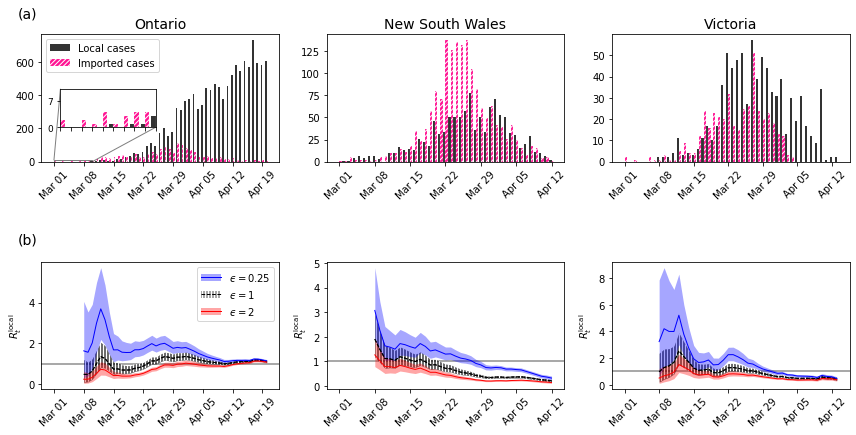

In [26]:
fig = plot_r_inference(
    datetime.datetime(2020, 3, 1),
    [locally_infected_cases_ON, locally_infected_cases_NSW, locally_infected_cases_VIC],
    [imported_cases_ON, imported_cases_NSW, imported_cases_VIC],
    datetime.datetime(2020, 3, 1) + datetime.timedelta(days=inference_times[0]-1),
    list(epsilon_range),
    [[all_intervals_ON.loc[all_intervals_ON['Epsilon']==eps] for eps in epsilon_range],
    [all_intervals_NSW.loc[all_intervals_NSW['Epsilon']==eps] for eps in epsilon_range],
    [all_intervals_VIC.loc[all_intervals_VIC['Epsilon']==eps] for eps in epsilon_range]],
    prior_dist.median(),
    default_epsilon=1,
    show=False)

plt.savefig('combined_inference.pdf')